<a href="https://colab.research.google.com/github/HudaZainElAbden/Player-value-prediction-AND-Player-level-classification/blob/main/Player_Value_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%pip install --upgrade category_encoders
from category_encoders import TargetEncoder



     |████████████████████████████████| 80 kB 3.5 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Load player player_data set & print head**

In [ ]:
player_data=pd.read_csv("player-value-prediction.csv")
player_data.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,value
0,210824,F. Tchenkoua,Fabien Tchenkoua,10/1/1992,26,172.72,73.9,"LM,RM",Cameroon,64,...,51+2,51+2,51+2,57+2,56+2,50+2,50+2,50+2,56+2,525000.0
1,172835,M. Andreolli,Marco Andreolli,6/10/1986,32,187.96,79.8,CB,Italy,72,...,61+2,61+2,61+2,54+2,58+2,71+2,71+2,71+2,58+2,1800000.0
2,212223,S. Maguire,Sean Maguire,5/1/1994,24,175.26,68.0,"ST,LM",Republic of Ireland,71,...,48+2,48+2,48+2,53+2,51+2,47+2,47+2,47+2,51+2,3400000.0
3,188168,G. Friend,George Friend,10/19/1987,31,187.96,83.0,"LB,LWB",England,72,...,68+2,68+2,68+2,70+2,70+2,70+2,70+2,70+2,70+2,2200000.0
4,226139,J. Tamimi,Jonathan Tamimi,10/12/1994,24,175.26,74.8,"RWB,RM",Jordan,64,...,58+2,58+2,58+2,62+2,61+2,58+2,58+2,58+2,61+2,525000.0


**Display some info about player_data set**

In [ ]:
player_data.describe()

,id,age,height_cm,weight_kgs,overall_rating,potential,wage,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,value
count,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14172.000000,14363.000000,14363.000000,14363.000000,...,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.00000,14363.000000,14363.000000,14363.000000,1.416500e+04
mean,215308.410569,25.575367,174.902069,75.304268,66.257676,71.435355,9888.371437,1.110701,2.946738,2.358560,...,58.680847,47.091207,47.676460,45.678619,16.841537,16.62111,16.431247,16.595558,16.952447,2.481204e+06
std,29906.749470,4.700271,14.056556,7.085472,6.958515,6.120675,21943.412002,0.392804,0.662851,0.762557,...,11.628867,20.106413,21.763713,21.359824,17.968259,17.17393,16.761096,17.328204,18.265496,5.726778e+06
min,16.000000,17.000000,152.400000,49.900000,47.000000,48.000000,1000.000000,1.000000,1.000000,1.000000,...,12.000000,3.000000,2.000000,4.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000e+04
25%,200913.000000,22.000000,154.940000,69.900000,62.000000,67.000000,1000.000000,1.000000,3.000000,2.000000,...,51.000000,29.000000,26.000000,24.000000,8.000000,8.00000,8.000000,8.000000,8.000000,3.250000e+05
50%,222771.000000,25.000000,175.260000,74.800000,66.000000,71.000000,3000.000000,1.000000,3.000000,2.000000,...,60.000000,52.000000,55.000000,52.000000,11.000000,11.00000,11.000000,11.000000,11.000000,7.000000e+05
75%,237607.000000,29.000000,185.420000,79.800000,71.000000,75.000000,9000.000000,1.000000,3.000000,3.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.00000,14.000000,14.000000,14.000000,2.100000e+06
max,247607.000000,45.000000,205.740000,110.200000,94.000000,95.000000,455000.000000,5.000000,5.000000,5.000000,...,95.000000,94.000000,93.000000,90.000000,90.000000,92.00000,91.000000,90.000000,94.000000,1.080000e+08


**check nulls in player_data**


id               0
name             0
full_name        0
birth_date       0
age              0
              ... 
LCB           1672
CB            1672
RCB           1672
RB            1672
value          198
Length: 92, dtype: int64
123044


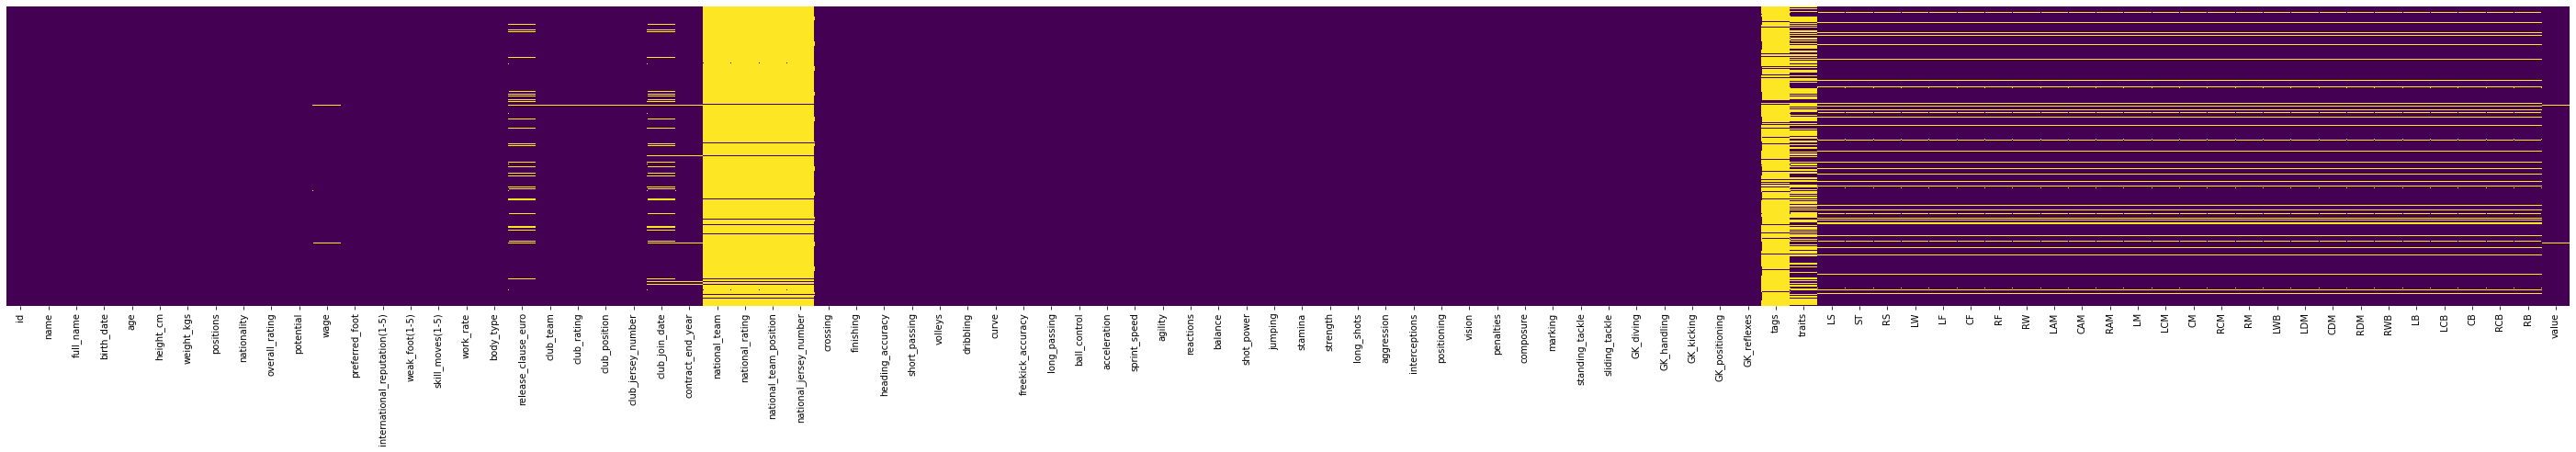

In [ ]:
print(player_data.isnull().sum())
print(player_data.isnull().values.sum())
f, ax = plt.subplots(figsize=(50, 6))
sns.heatmap(player_data.isnull(),yticklabels=False,cbar=False,cmap="viridis",ax=ax)

In [ ]:
data=player_data.copy()
data.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,value
0,210824,F. Tchenkoua,Fabien Tchenkoua,10/1/1992,26,172.72,73.9,"LM,RM",Cameroon,64,...,51+2,51+2,51+2,57+2,56+2,50+2,50+2,50+2,56+2,525000.0
1,172835,M. Andreolli,Marco Andreolli,6/10/1986,32,187.96,79.8,CB,Italy,72,...,61+2,61+2,61+2,54+2,58+2,71+2,71+2,71+2,58+2,1800000.0
2,212223,S. Maguire,Sean Maguire,5/1/1994,24,175.26,68.0,"ST,LM",Republic of Ireland,71,...,48+2,48+2,48+2,53+2,51+2,47+2,47+2,47+2,51+2,3400000.0
3,188168,G. Friend,George Friend,10/19/1987,31,187.96,83.0,"LB,LWB",England,72,...,68+2,68+2,68+2,70+2,70+2,70+2,70+2,70+2,70+2,2200000.0
4,226139,J. Tamimi,Jonathan Tamimi,10/12/1994,24,175.26,74.8,"RWB,RM",Jordan,64,...,58+2,58+2,58+2,62+2,61+2,58+2,58+2,58+2,61+2,525000.0


In [ ]:
#preprocessing of traits column
player_data['traits'] = player_data['traits'].fillna("Technical Dribbler (CPU AI Only)")# fill nulls with mod

traits_text=""
for i in player_data['traits']:
  traits_text=traits_text+','
  traits_text=traits_text+str(i)

trait_list = traits_text.split(',')

unique_list = []
for x in trait_list:
    if x not in unique_list:
      unique_list.append(x)

print(len(unique_list))

37


**Nulls** **handling** 

1.   wage & value ==> replace nulls with median(found that median =null ,so i replaced it with mode)
2.   national_rating,contract_end_year,club_join_date ==> fill nulls with zero

1.   club_rating==> replace nulls with mean




4.   Drop columns['national_team','national_team_position','tags','club_team','club_position','traits','national_jersey_number','club_jersey_number'])]
2.   predict nulls of last 27 columns





/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Test save knn
0        56+2
1        58+2
2        51+2
3        70+2
4        61+2
         ... 
14358    57+2
14359    53+2
14360    73+3
14361    55+2
14362    51+2
Name: RB, Length: 14363, dtype: object


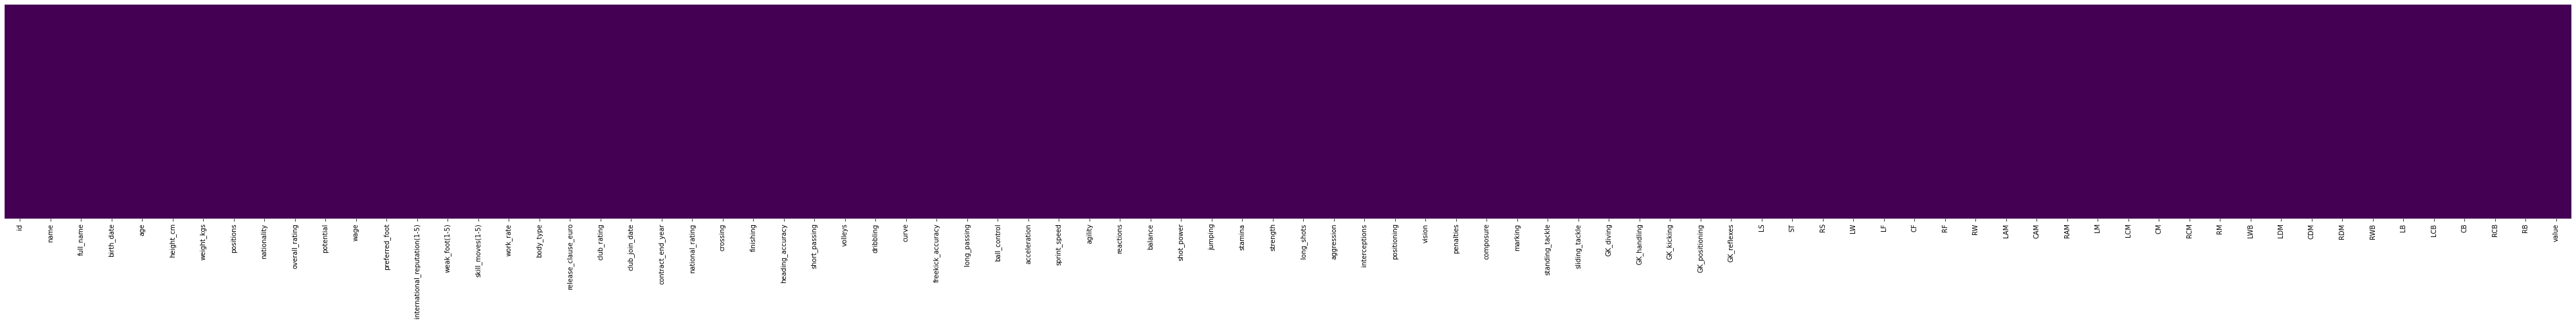

In [ ]:
#Drop columns
data.drop(['national_team','national_team_position','tags',
                  'club_team','club_position','traits','national_jersey_number','club_jersey_number'],axis=1, inplace=True)
#fill null with zero
data.fillna({'national_rating':0,'club_join_date':0,'contract_end_year':0},inplace=True) 



#replace nulls with mode
data['value'].fillna(player_data.value.mode()[0],inplace=True)
data['wage'].fillna(player_data.wage.mode()[0],inplace=True)
data['release_clause_euro'].fillna(player_data.release_clause_euro.mode()[0],inplace=True)
#replace nulls with mean
data['club_rating'].fillna(int(data['club_rating'].mean()),inplace=True)

#predict nulls
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform', 
metric = 'euclidean', algorithm = 'kd_tree')
df=player_data.iloc[:,65:92].dropna()
X_train=np.array(df.iloc[:,-1])
X_train = X_train.reshape(X_train.shape[0],1)
df.drop(['value'],axis=1,inplace=True)


def impute_missing_occ (row):
    if pd.isnull(row[column_name]) :
        return knn_model.predict(
            row[['value']].values.reshape((-1,1)))
    else:
        return row[[column_name]]
  
for i,column_name in enumerate(df.columns):
    y_train=np.array(df.iloc[:,i])
    y_train = y_train.reshape(y_train.shape[0],1)
    knn_model.fit(X_train, y_train)
    data[column_name]=data.apply(impute_missing_occ,axis=1) 

print("Test save knn")
print(data[column_name])

f, ax = plt.subplots(figsize=(70, 6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis",ax=ax)

In [ ]:
%pip install researchpy
import researchpy as rp

catCols = player_data.select_dtypes("object").columns
V=np.zeros([df.shape[1],df.shape[1]])
for i,column_name in enumerate(df.columns):
    v=[]
    for j,name in enumerate(df.columns): 
        ctab,chi_statistic,expected=rp.crosstab(player_data[name],player_data[column_name],margins=False,test='chi-square',expected_freqs=True)
        v.append(chi_statistic.iloc[2,1])
    V[i]=v 

categories_corr=pd.DataFrame(V,index=df.columns,columns=df.columns)   
categories_corr 

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
LS,1.0000,1.0000,1.0000,0.4722,0.5004,0.5004,0.5004,0.4722,0.4492,0.4492,...,0.3092,0.3212,0.3212,0.3212,0.3092,0.3140,0.3371,0.3371,0.3371,0.3140
ST,1.0000,1.0000,1.0000,0.4722,0.5004,0.5004,0.5004,0.4722,0.4492,0.4492,...,0.3092,0.3212,0.3212,0.3212,0.3092,0.3140,0.3371,0.3371,0.3371,0.3140
RS,1.0000,1.0000,1.0000,0.4722,0.5004,0.5004,0.5004,0.4722,0.4492,0.4492,...,0.3092,0.3212,0.3212,0.3212,0.3092,0.3140,0.3371,0.3371,0.3371,0.3140
LW,0.4722,0.4722,0.4722,1.0000,0.5777,0.5777,0.5777,1.0000,0.5501,0.5501,...,0.3285,0.3148,0.3148,0.3148,0.3285,0.3264,0.3228,0.3228,0.3228,0.3264
LF,0.5004,0.5004,0.5004,0.5777,1.0000,1.0000,1.0000,0.5777,0.5669,0.5669,...,0.3181,0.3175,0.3175,0.3175,0.3181,0.3245,0.3308,0.3308,0.3308,0.3245
CF,0.5004,0.5004,0.5004,0.5777,1.0000,1.0000,1.0000,0.5777,0.5669,0.5669,...,0.3181,0.3175,0.3175,0.3175,0.3181,0.3245,0.3308,0.3308,0.3308,0.3245
RF,0.5004,0.5004,0.5004,0.5777,1.0000,1.0000,1.0000,0.5777,0.5669,0.5669,...,0.3181,0.3175,0.3175,0.3175,0.3181,0.3245,0.3308,0.3308,0.3308,0.3245
RW,0.4722,0.4722,0.4722,1.0000,0.5777,0.5777,0.5777,1.0000,0.5501,0.5501,...,0.3285,0.3148,0.3148,0.3148,0.3285,0.3264,0.3228,0.3228,0.3228,0.3264
LAM,0.4492,0.4492,0.4492,0.5501,0.5669,0.5669,0.5669,0.5501,1.0000,1.0000,...,0.3235,0.3154,0.3154,0.3154,0.3235,0.3239,0.3314,0.3314,0.3314,0.3239
CAM,0.4492,0.4492,0.4492,0.5501,0.5669,0.5669,0.5669,0.5501,1.0000,1.0000,...,0.3235,0.3154,0.3154,0.3154,0.3235,0.3239,0.3314,0.3314,0.3314,0.3239


**Handling categories**

1.   work_rate,body_type ==> label_encoding
2.  preffered_foot ==> one hot encoding

1.   positions ==> split by (,),then apply labe encoding

2.   last 27 columns ==> target encoding






In [ ]:
# Splitting strings
data['club_join_date'] = data['club_join_date'].astype(str)
for i,cell in enumerate(data['club_join_date']):
      
      if cell=="0":
            data['club_join_date'][i]=int(0)
      else:
            data['club_join_date'][i]=int(cell.split('/')[2])    
data['club_join_date'] = data['club_join_date'].astype(int)
            


data['contract_end_year'] = data['contract_end_year'].astype(str)
for i,cell in enumerate(data['contract_end_year']):
      if cell=="0":
            data['contract_end_year'][i]=int(0)
      elif len(cell)>4:      
            data['contract_end_year'][i]=int("20"+cell.split('-')[2])
            
data['contract_end_year'] = data['contract_end_year'].astype(int)      


for i,cell in enumerate(data['contract_end_year']):
    if data['contract_end_year'][i]==0 and data['club_join_date'][i]>0:
         data['club_join_date'][i]=0
    elif data['contract_end_year'][i]>0 and data['club_join_date'][i]==0:
         data['contract_end_year'][i]=0

# subtract contract_end_year from club_join_date
years_player_club=data['contract_end_year']-data['club_join_date']
data.insert(20,'years_player_club',years_player_club)
# Drop contract_end_year & club_join_date
data.drop(['contract_end_year','club_join_date'], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying 

In [ ]:
split_positions = data['positions'].str.split(',', expand = True).rename(columns = {0:"first_positions",1:"second_positions",2:"third_positions",3:"fourth_positions",})
split_positions = split_positions.fillna("0")  


# labelencoder = LabelEncoder()

# split_positions['label_first_pos'] =  labelencoder.fit_transform(split_positions['first_positions'])
# split_positions['label_second_pos'] =  labelencoder.fit_transform(split_positions['second_positions'])
# split_positions['label_third_pos'] =  labelencoder.fit_transform(split_positions['third_positions'])
# split_positions['label_fourth_pos'] =  labelencoder.fit_transform(split_positions['fourth_positions'])

# split_positions.drop('first_positions', axis=1, inplace=True)
# split_positions.drop('second_positions', axis=1, inplace=True)
# split_positions.drop('third_positions', axis=1, inplace=True)
# split_positions.drop('fourth_positions', axis=1, inplace=True)

# for i,c in enumerate(split_positions.columns):
#     data.insert(7+i,c,split_positions[c])

data.drop(['positions'],axis=1,inplace=True)


In [ ]:
def body_type_encoding(row):
    if row[["body_type"]].values == "Lean" :
        return 1;
    elif row[["body_type"]].values == "Normal" :
        return 2;  
    elif row[["body_type"]].values == "Stocky" :
        return 3;     
    else:
        return 2;

data["body_type"]=data.apply(body_type_encoding,axis=1)  


#work rate encoding
def work_rate_encoding(row):
    if row[["work_rate"]].values == "Low/ Low" :
        return 1;
    elif row[["work_rate"]].values == "Low/ Medium" :
        return 2;  
    elif row[["work_rate"]].values == "Medium/ Medium" :
        return 3;  
    elif row[["work_rate"]].values == "Low/ High" :
        return 4;
    elif row[["work_rate"]].values == "Medium/ Low" :
        return 5;
    elif row[["work_rate"]].values == "Medium/ High" :
        return 6;
    elif row[["work_rate"]].values == "High/ Low" :
        return 7;
    elif row[["work_rate"]].values == "High/ Medium" :
        return 8;
    elif row[["work_rate"]].values == "High/ High" :
        return 9;                           
    else:
        return 3;

data["work_rate"]=data.apply(work_rate_encoding,axis=1)


#one hot encoding
data['preferred_foot'].unique()
one_hot_encoder = OneHotEncoder()
preferred_foot_array = one_hot_encoder.fit_transform(data[['preferred_foot']]).toarray()
preferred_foot_labels = np.array(one_hot_encoder.categories_).ravel()#to make it an array, and .ravel() to convert it from array of arrays to array of strings
preferred_foot = pd.DataFrame(preferred_foot_array, columns=preferred_foot_labels)
v=data['value']
data.drop(['value','preferred_foot'],axis=1,inplace=True)
data = pd.concat([data, preferred_foot], axis = 1)
data = pd.concat([data, v], axis = 1)

#target encoding
X=player_data.iloc[:,65:91]


for i,c in enumerate(X.columns):
     encoder=TargetEncoder()
     data[c]=encoder.fit_transform(data[c],data['value'].astype('int'))
    

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14363 entries, 0 to 14362
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             14363 non-null  int64  
 1   name                           14363 non-null  object 
 2   full_name                      14363 non-null  object 
 3   birth_date                     14363 non-null  object 
 4   age                            14363 non-null  int64  
 5   height_cm                      14363 non-null  float64
 6   weight_kgs                     14363 non-null  float64
 7   nationality                    14363 non-null  object 
 8   overall_rating                 14363 non-null  int64  
 9   potential                      14363 non-null  int64  
 10  wage                           14363 non-null  float64
 11  international_reputation(1-5)  14363 non-null  int64  
 12  weak_foot(1-5)                 14363 non-null 

**Extract important features**


In [ ]:
pd.set_option('display.max_columns', 500)
player_data.corr()

,id,age,height_cm,weight_kgs,overall_rating,potential,wage,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),release_clause_euro,club_rating,club_jersey_number,national_rating,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,value
id,1.000000,-0.745924,-0.066921,-0.194347,-0.421744,0.057157,-0.212927,-0.358141,-0.073509,-0.060315,-0.125811,-0.092799,0.179393,-0.121907,0.120952,-0.129660,-0.087330,-0.112121,-0.136442,-0.160192,-0.031815,-0.166640,-0.198469,-0.186344,-0.102106,0.133069,0.134029,-0.019325,-0.414497,0.046946,-0.168458,-0.173803,-0.053315,-0.268340,-0.165450,-0.232529,-0.159440,-0.087635,-0.212436,-0.147834,-0.385195,-0.116366,-0.083340,-0.066150,-0.104065,-0.109114,-0.105234,-0.117351,-0.104250,-0.142089
age,-0.745924,1.000000,0.063121,0.232562,0.461709,-0.259687,0.154247,0.256339,0.059249,0.032653,0.063743,0.026373,-0.240699,0.034718,-0.134170,0.135044,0.077688,0.152053,0.135833,0.145899,0.018161,0.147600,0.194912,0.183973,0.092335,-0.147738,-0.145029,-0.011918,0.464727,-0.079133,0.160115,0.180622,0.100907,0.337949,0.164061,0.265571,0.198532,0.085815,0.193465,0.149895,0.394404,0.147563,0.117122,0.101341,0.099225,0.103480,0.102583,0.114369,0.101886,0.081839
height_cm,-0.066921,0.063121,1.000000,0.496268,0.038438,0.007187,0.019831,0.027580,-0.130777,-0.322765,0.008952,0.035924,-0.024207,0.105210,-0.079945,-0.391016,-0.297575,-0.046427,-0.292246,-0.279969,-0.382790,-0.344481,-0.312558,-0.262805,-0.329613,-0.412083,-0.356201,-0.441228,-0.019210,-0.533683,-0.238121,-0.057756,-0.262378,0.314905,-0.302259,-0.077040,-0.080529,-0.356700,-0.286658,-0.270648,-0.111496,-0.090634,-0.083005,-0.087522,0.298387,0.300823,0.295080,0.299882,0.299821,0.008243
weight_kgs,-0.194347,0.232562,0.496268,1.000000,0.153005,-0.012678,0.065538,0.090888,-0.129177,-0.352437,0.039893,0.065660,-0.083759,0.082773,-0.099245,-0.395497,-0.294768,0.022951,-0.291502,-0.263154,-0.412048,-0.345230,-0.306411,-0.258064,-0.338993,-0.483002,-0.416904,-0.533783,0.082723,-0.661133,-0.196457,0.001880,-0.240046,0.605324,-0.276229,0.014142,-0.038495,-0.358275,-0.279520,-0.251592,-0.044247,-0.059815,-0.061076,-0.071301,0.346236,0.346405,0.343403,0.348722,0.348003,0.047201
overall_rating,-0.421744,0.461709,0.038438,0.153005,1.000000,0.646751,0.578014,0.487549,0.216293,0.419611,0.613272,0.609519,-0.209501,0.729790,-0.132585,0.399154,0.340685,0.349463,0.506701,0.392195,0.378505,0.423787,0.400532,0.491276,0.463719,0.205539,0.218550,0.275740,0.855760,0.114452,0.445206,0.275371,0.369579,0.367066,0.428477,0.400268,0.326411,0.360429,0.505895,0.351707,0.729078,0.297122,0.256949,0.229021,-0.032334,-0.032872,-0.037058,-0.024434,-0.031816,0.628308
potential,0.057157,-0.259687,0.007187,-0.012678,0.646751,1.000000,0.484396,0.359194,0.167125,0.354497,0.582766,0.677349,0.002739,0.653627,-0.043588,0.241748,0.243578,0.205230,0.369353,0.252195,0.313695,0.277206,0.229885,0.324677,0.349032,0.238242,0.242878,0.225721,0.504201,0.139371,0.287785,0.113608,0.202100,0.086110,0.264166,0.173272,0.156401,0.245492,0.347208,0.225618,0.434636,0.167049,0.147443,0.134846,-0.060195,-0.062007,-0.066899,-0.059544,-0.061874,0.574187
wage,-0.212927,0.154247,0.019831,0.065538,0.578014,0.484396,1.000000,0.673709,0.142333,0.267703,0.854397,0.547299,-0.086565,0.537949,-0.140749,0.237160,0.220332,0.196279,0.302481,0.258168,0.239644,0.265131,0.241888,0.287182,0.281252,0.129321,0.134123,0.161703,0.505920,0.093461,0.263111,0.144519,0.189501,0.154837,0.253906,0.206635,0.168624,0.230648,0.322163,0.230118,0.428173,0.157407,0.135710,0.121637,-0.029765,-0.030017,-0.032902,-0.030790,-0.031959,0.855451
international_reputation(1-5),-0.358141,0.256339,0.027580

In [ ]:
feature_matrix=player_data.drop(['value'],axis=1)

In [ ]:
#with the following function we can select highly correlated features
#it will remove the first feature that is correlated with anything other features
def correlation(corr_matrix,threshold):
    col_corr=set()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>=threshold:
                colname=corr_matrix.columns[i] #getting the name of the column
                col_corr.add(colname)
    return col_corr   

In [ ]:
corr_matrix=feature_matrix.corr()
corr_features=correlation(corr_matrix,0.8)
print(len(set(corr_features)))
corr_features

22


{'GK_handling',
 'GK_kicking',
 'GK_positioning',
 'GK_reflexes',
 'agility',
 'ball_control',
 'curve',
 'dribbling',
 'freekick_accuracy',
 'long_passing',
 'long_shots',
 'marking',
 'penalties',
 'positioning',
 'reactions',
 'release_clause_euro',
 'short_passing',
 'shot_power',
 'sliding_tackle',
 'sprint_speed',
 'standing_tackle',
 'volleys'}

In [ ]:
corr_categories_features=correlation(categories_corr,1.0)
print(len(set(corr_categories_features)))
corr_categories_features

16


{'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST'}

In [ ]:
df=data.copy()

data.drop(['id','name','full_name','birth_date','height_cm','nationality'],axis=1,inplace=True)
data.drop(corr_features,axis=1,inplace=True)
data.drop(corr_categories_features,axis=1,inplace=True)
print(data.shape)

(14363, 39)


In [ ]:
X=data.iloc[:,0:len(data.iloc[0,:])-1]#features
Y=data.iloc[:,-1]#label

In [ ]:
#feature scaling
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,age,weight_kgs,overall_rating,potential,wage,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,body_type,...,LF,LAM,LM,LCM,LWB,LDM,LB,LCB,Left,Right
0,0.321429,0.398010,0.361702,0.361702,0.000000,0.00,0.5,0.50,0.875,0.5,...,0.015689,0.018945,0.016125,0.017359,0.030487,0.032565,0.024049,0.052012,0.0,1.0
1,0.535714,0.495854,0.531915,0.510638,0.022026,0.25,0.5,0.25,0.125,0.0,...,0.007656,0.011636,0.006996,0.007233,0.025444,0.025865,0.021810,0.087188,0.0,1.0
2,0.250000,0.300166,0.510638,0.638298,0.019824,0.00,0.5,0.50,0.875,0.0,...,0.055186,0.032103,0.037283,0.020856,0.025870,0.029236,0.031613,0.043562,0.0,1.0
3,0.500000,0.548922,0.531915,0.510638,0.070485,0.00,0.5,0.50,1.000,0.5,...,0.015689,0.018945,0.021975,0.049880,0.095983,0.055595,0.078191,0.071974,1.0,0.0
4,0.250000,0.412935,0.361702,0.489362,0.000000,0.00,0.5,0.25,0.250,0.0,...,0.010145,0.010787,0.011510,0.017359,0.033017,0.032862,0.020798,0.017596,0.0,1.0


In [ ]:
#split data int train 80%  test 20%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,shuffle=True,random_state=10)

print(X_train.shape)
print(X_test.shape)

(11490, 38)
(2873, 38)


**Apply   polynomial/Normal/Regularized   regression model**

In [ ]:
import time
def model_trial(X_train, X_test, y_train, y_test, model, degree=30):
    start=time.time()
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)

    model.fit(X_train_poly, y_train)

    y_train_predicted = model.predict(X_train_poly)
    prediction = model.predict(poly_features.fit_transform(X_test))

    train_err = metrics.mean_squared_error(y_train, y_train_predicted)
    test_err = metrics.mean_squared_error(y_test, prediction)
    end=time.time()
    print('Train subset (RMSE) for degree {}: '.format(degree), np.sqrt(train_err))
    print('test subset (RMSE) for degree {}: '.format(degree), np.sqrt(test_err))
    print('Train data Accuracy',model.score(X_train_poly,y_train))
    print('Test data Accuracy',model.score(poly_features.fit_transform(X_test),y_test))
    print(f"Training time:{end - start}s")

In [ ]:
import time
import joblib

def model_trial_R(X_train, X_test, y_train, y_test, model, degree=30):
    start=time.time()
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)

    model.fit(X_train_poly, y_train)

    y_train_predicted = model.predict(X_train_poly)

#save model
    filename = "prediction_test"
    joblib.dump(model,filename)


    prediction = model.predict(poly_features.fit_transform(X_test))

    train_err = metrics.mean_squared_error(y_train, y_train_predicted)
    test_err = metrics.mean_squared_error(y_test, prediction)
    end=time.time()
    print('Train subset (RMSE) for degree {}: '.format(degree), np.sqrt(train_err))
    print('test subset (RMSE) for degree {}: '.format(degree), np.sqrt(test_err))
    print('Train data Accuracy',model.score(X_train_poly,y_train))
    print('Test data Accuracy',model.score(poly_features.fit_transform(X_test),y_test))
    print(f"Training time:{end - start}s")

In [ ]:
def cross_validation(X_train, y_train, model,Cfold=10, degree=30):
    poly_features = PolynomialFeatures(degree=degree)
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
    # fit the transformed features to Linear Regression
    scores = cross_val_score(model, X_train_poly, y_train, scoring='neg_mean_squared_error', cv=Cfold)
    model_2_score = abs(scores.mean())
    model.fit(X_train_poly, y_train)

    print("cross validation score is ",np.sqrt(model_2_score))

In [ ]:
#tuning degree of polynomial regression
print("polynomial_model of degree 1 with cross validation")
cross_validation(X_train, y_train ,linear_model.LinearRegression(),10,1)
print("polynomial_model of degree 2 with cross validation")
cross_validation(X_train, y_train ,linear_model.LinearRegression(),10,2)

polynomial_model of degree 1 with cross validation
cross validation score is  1875752.765098274
polynomial_model of degree 2 with cross validation
cross validation score is  1247836.0534200782


In [ ]:
# best model with degree 2
print("polynomial model")
model_trial(X_train, X_test, y_train, y_test ,linear_model.LinearRegression(),2)

polynomial model
Train subset (RMSE) for degree 2:  535036.2352122045
test subset (RMSE) for degree 2:  1381556.7171111035
Train data Accuracy 0.9903332838022798
Test data Accuracy 0.9559979489547514
Training time:1.4557209014892578s


In [ ]:
#tune degree with redge model
print('Ridge model')
cross_validation(X_train, y_train, linear_model.Ridge(),10,1)
cross_validation(X_train, y_train, linear_model.Ridge(),10,2)
cross_validation(X_train, y_train, linear_model.Ridge(),5,3)

Ridge model
cross validation score is  1876072.5767333717
cross validation score is  1048677.7554352267
cross validation score is  897696.5308909385


In [ ]:
#tuning alpha for ridge regression model using GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train_poly,y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-933216071788.1676


In [ ]:
# best model with degree 2 and alpha=0.01
print("Ridge model")
model_trial_R(X_train, X_test, y_train, y_test ,linear_model.Ridge(alpha=0.01),2)

Ridge model
Train subset (RMSE) for degree 2:  566836.6240935553
test subset (RMSE) for degree 2:  1265269.717106255
Train data Accuracy 0.9891500338537255
Test data Accuracy 0.963093597773523
Training time:0.6220986843109131s
